In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings(action='ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:18px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
              color:white">
Titanic 🚢 - AutoML practice  
</h1>
</div>
</div>

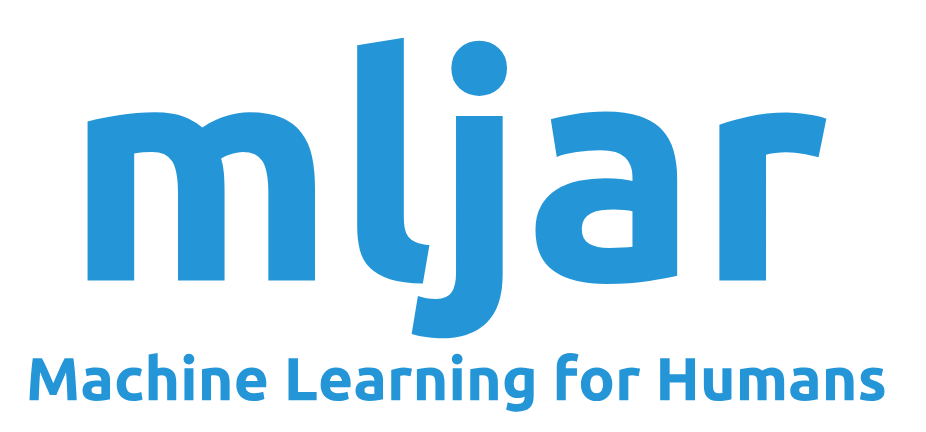

Thanks for introducing [@Chanyoung Kim](https://www.kaggle.com/kimchanyoung)  
https://www.kaggle.com/code/kimchanyoung/titanic-easiest-automl


In [ ]:
# install autoML 
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

In [ ]:
# load datasets
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

print(train_df.info())
print('😀 --------------------------------------')
print(test_df.info())

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:18px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
              color:white">
Simple preprocessing
</h1>
</div>
</div>

We've found some missing values in two columns `Age` and `Cabin`, bty I only filled NaNs in`Age` by generating random numbers within the range of variation from the mean to the standard deviation and just dropped `Cabin`.

In [ ]:
# get average, std, counts 
age_mean_train = train_df['Age'].mean()
age_std_train = train_df['Age'].std()
age_count_train = train_df['Age'].isnull().sum()

age_mean_test = test_df['Age'].mean()
age_std_test = test_df['Age'].std()
age_count_test = test_df['Age'].isnull().sum()

# random values beween [mean-std, mean+std]
rand_age_tr = np.random.randint(age_mean_train-age_std_train, age_mean_train+age_std_train,size=age_count_train)
rand_age_te = np.random.randint(age_mean_test-age_std_test, age_mean_test+age_std_test, size=age_count_test)

# fill NaN values with generated random values
train_df['Age'][np.isnan(train_df['Age'])] = rand_age_tr
test_df['Age'][np.isnan(test_df['Age'])] = rand_age_te

# convert from float to int
train_df['Age'] = train_df['Age'].astype('int')
test_df['Age'] = test_df['Age'].astype('int')

In [ ]:
# drop unnecessary columns
train = train_df.drop(['PassengerId', 'Survived', 'Cabin'], axis=1, inplace=False)
test = test_df.drop(['PassengerId','Cabin'], axis=1, inplace=False)

X = train
y = train_df['Survived']

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:18px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
              color:white">
perform EDA in a single line of code
</h1>
</div>
</div>

In [ ]:
from supervised.preprocessing.eda import EDA

EDA.extensive_eda(X, y, save_path='./')

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:18px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
              color:white">
mljar AutoML
</h1>
</div>
</div>

In [ ]:
from supervised import AutoML

# compete mode which can be used in competitions under time budget
automl = AutoML(total_time_limit= 60*10,
                model_time_limit = 100,
                mode = "Compete",
                eval_metric="accuracy",
                algorithms = ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'CatBoost', 'Neural Network', 'Nearest Neighbors'],
                ml_task = 'binary_classification',
                train_ensemble=True,
                n_jobs = -1,
                random_state = 1004
               )

automl.fit(X, y)

In [ ]:
# perform mode for building ML pipelines to use in production
automl2 = AutoML(mode = 'Perform',
                 ml_task = 'binary_classification',
                 eval_metric = 'accuracy',
                 algorithms = ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'CatBoost', 'Neural Network', 'Nearest Neighbors'],
                 train_ensemble = True,
                 n_jobs = -1,
                 random_state = 1004
                ) 
automl2.fit(X, y)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:white;
           display:fill;
           border-radius:18px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
              color:white">
Summary
</h1>
</div>
</div>

In [ ]:
# pd.set_option('display.max_rows', None)
# automl.get_leaderboard()

In [ ]:
automl.report()

In [ ]:
automl2.report()